In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
FILE_PATH = 'financial_loan.csv'
LOAN_DATAFRAME = pd.read_csv(FILE_PATH)
LOAN_DATAFRAME.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [6]:
LOAN_DATAFRAME.info()
print("\n--- Missing Values Count ---")
print(LOAN_DATAFRAME.isnull().sum())

DATE_COLUMNS = ['issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']
for COLUMN in DATE_COLUMNS:
    LOAN_DATAFRAME[COLUMN] = pd.to_datetime(LOAN_DATAFRAME[COLUMN], errors='coerce')

for COLUMN in LOAN_DATAFRAME.columns:
    if LOAN_DATAFRAME[COLUMN].dtype == 'object':
        LOAN_DATAFRAME[COLUMN].fillna(LOAN_DATAFRAME[COLUMN].mode()[0], inplace=True)
    elif LOAN_DATAFRAME[COLUMN].dtype in ['int64', 'float64']:
        LOAN_DATAFRAME[COLUMN].fillna(LOAN_DATAFRAME[COLUMN].median(), inplace=True)
    elif LOAN_DATAFRAME[COLUMN].dtype.name.startswith('datetime'):
         LOAN_DATAFRAME[COLUMN].fillna(LOAN_DATAFRAME[COLUMN].mode()[0], inplace=True)

LOAN_DATAFRAME['ISSUE_MONTH'] = LOAN_DATAFRAME['issue_date'].dt.month_name()
LOAN_DATAFRAME['ISSUE_YEAR'] = LOAN_DATAFRAME['issue_date'].dt.year

GOOD_LOAN_STATUSES = ['Fully Paid', 'Current']
LOAN_DATAFRAME['LOAN_CONDITION'] = np.where(LOAN_DATAFRAME['loan_status'].isin(GOOD_LOAN_STATUSES), 'Good Loan', 'Bad Loan')

print("\n--- Data Information After Cleaning ---")
LOAN_DATAFRAME.info()
print("\n--- First 5 Rows After Cleaning ---")
LOAN_DATAFRAME.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

/tmp/ipython-input-1251585083.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1251585083.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,ISSUE_MONTH,ISSUE_YEAR,LOAN_CONDITION
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,30000.0,0.0100,59.83,0.1527,2500,4,1009,February,2021,Bad Loan
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,48000.0,0.0535,109.43,0.1864,3000,4,3939,January,2021,Good Loan
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,50000.0,0.2088,421.65,0.1596,12000,11,3522,January,2021,Bad Loan
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,42000.0,0.0540,97.06,0.1065,4500,9,4911,February,2021,Good Loan
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,83000.0,0.0231,106.53,0.0603,3500,28,3835,January,2021,Good Loan


In [7]:
TOTAL_LOAN_APPLICATIONS = len(LOAN_DATAFRAME)
print(f"Total Loan Applications: {TOTAL_LOAN_APPLICATIONS}")

LATEST_MONTH = LOAN_DATAFRAME['issue_date'].max().month
LATEST_YEAR = LOAN_DATAFRAME['issue_date'].max().year
MONTH_TO_DATE_LOAN_APPLICATIONS = LOAN_DATAFRAME[(LOAN_DATAFRAME['issue_date'].dt.month == LATEST_MONTH) & (LOAN_DATAFRAME['issue_date'].dt.year == LATEST_YEAR)].shape[0]
print(f"Month-to-Date (MTD) Loan Applications: {MONTH_TO_DATE_LOAN_APPLICATIONS}")

TOTAL_FUNDED_AMOUNT = LOAN_DATAFRAME['loan_amount'].sum()
print(f"\nTotal Funded Amount: ${TOTAL_FUNDED_AMOUNT:,.2f}")

MONTH_TO_DATE_FUNDED_AMOUNT = LOAN_DATAFRAME[(LOAN_DATAFRAME['issue_date'].dt.month == LATEST_MONTH) & (LOAN_DATAFRAME['issue_date'].dt.year == LATEST_YEAR)]['loan_amount'].sum()
print(f"MTD Total Funded Amount: ${MONTH_TO_DATE_FUNDED_AMOUNT:,.2f}")

TOTAL_AMOUNT_RECEIVED = LOAN_DATAFRAME['total_payment'].sum()
print(f"\nTotal Amount Received: ${TOTAL_AMOUNT_RECEIVED:,.2f}")

MONTH_TO_DATE_AMOUNT_RECEIVED = LOAN_DATAFRAME[(LOAN_DATAFRAME['issue_date'].dt.month == LATEST_MONTH) & (LOAN_DATAFRAME['issue_date'].dt.year == LATEST_YEAR)]['total_payment'].sum()
print(f"MTD Total Amount Received: ${MONTH_TO_DATE_AMOUNT_RECEIVED:,.2f}")

AVERAGE_INTEREST_RATE = LOAN_DATAFRAME['int_rate'].mean()
print(f"\nAverage Interest Rate: {AVERAGE_INTEREST_RATE:.2%}")

AVERAGE_DEBT_TO_INCOME_RATIO = LOAN_DATAFRAME['dti'].mean()
print(f"Average Debt-to-Income Ratio (DTI): {AVERAGE_DEBT_TO_INCOME_RATIO:.2%}")

Total Loan Applications: 38576
Month-to-Date (MTD) Loan Applications: 4314

Total Funded Amount: $435,757,075.00
MTD Total Funded Amount: $53,981,425.00

Total Amount Received: $473,070,933.00
MTD Total Amount Received: $58,074,380.00

Average Interest Rate: 12.05%
Average Debt-to-Income Ratio (DTI): 13.33%


In [8]:
LOAN_CONDITION_SUMMARY = LOAN_DATAFRAME.groupby('LOAN_CONDITION').agg(
    TOTAL_APPLICATIONS=('id', 'count'),
    TOTAL_FUNDED_AMOUNT=('loan_amount', 'sum'),
    TOTAL_RECEIVED_AMOUNT=('total_payment', 'sum')
).reset_index()

LOAN_CONDITION_SUMMARY['APPLICATION_PERCENTAGE'] = (LOAN_CONDITION_SUMMARY['TOTAL_APPLICATIONS'] / TOTAL_LOAN_APPLICATIONS) * 100

print("--- Good Loan vs. Bad Loan Summary ---")
print(LOAN_CONDITION_SUMMARY)

for index, row in LOAN_CONDITION_SUMMARY.iterrows():
    print(f"\n--- {row['LOAN_CONDITION']} KPIs ---")
    print(f"{row['LOAN_CONDITION']} Application Percentage: {row['APPLICATION_PERCENTAGE']:.2f}%")
    print(f"{row['LOAN_CONDITION']} Applications: {row['TOTAL_APPLICATIONS']}")
    print(f"{row['LOAN_CONDITION']} Funded Amount: ${row['TOTAL_FUNDED_AMOUNT']:,.2f}")
    print(f"{row['LOAN_CONDITION']} Total Received Amount: ${row['TOTAL_RECEIVED_AMOUNT']:,.2f}")

--- Good Loan vs. Bad Loan Summary ---
  LOAN_CONDITION  TOTAL_APPLICATIONS  TOTAL_FUNDED_AMOUNT  \
0       Bad Loan                5333             65532225   
1      Good Loan               33243            370224850   

   TOTAL_RECEIVED_AMOUNT  APPLICATION_PERCENTAGE  
0               37284763               13.824658  
1              435786170               86.175342  

--- Bad Loan KPIs ---
Bad Loan Application Percentage: 13.82%
Bad Loan Applications: 5333
Bad Loan Funded Amount: $65,532,225.00
Bad Loan Total Received Amount: $37,284,763.00

--- Good Loan KPIs ---
Good Loan Application Percentage: 86.18%
Good Loan Applications: 33243
Good Loan Funded Amount: $370,224,850.00
Good Loan Total Received Amount: $435,786,170.00


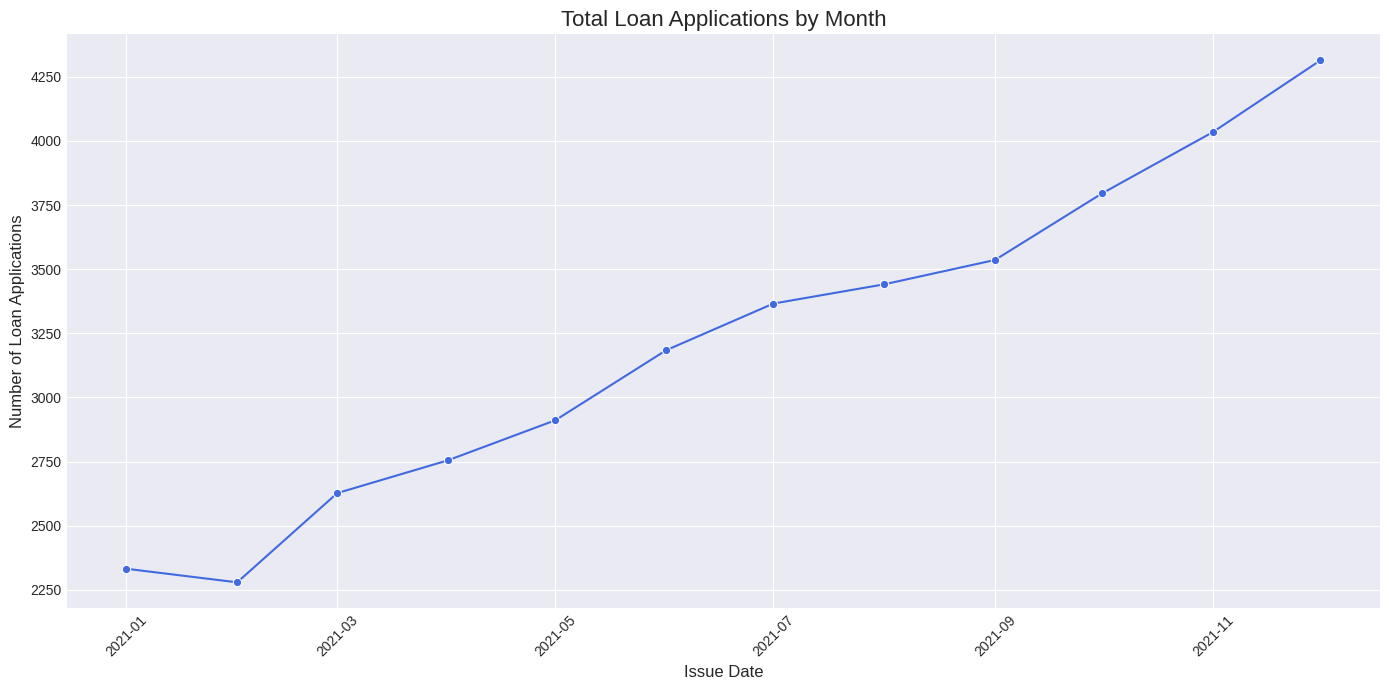

In [9]:
plt.style.use('seaborn-v0_8-darkgrid')
MONTHLY_TRENDS = LOAN_DATAFRAME.groupby(LOAN_DATAFRAME['issue_date'].dt.to_period('M')).size()
MONTHLY_TRENDS.index = MONTHLY_TRENDS.index.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(data=MONTHLY_TRENDS, marker='o', color='royalblue')
plt.title('Total Loan Applications by Month', fontsize=16)
plt.xlabel('Issue Date', fontsize=12)
plt.ylabel('Number of Loan Applications', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1873632461.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




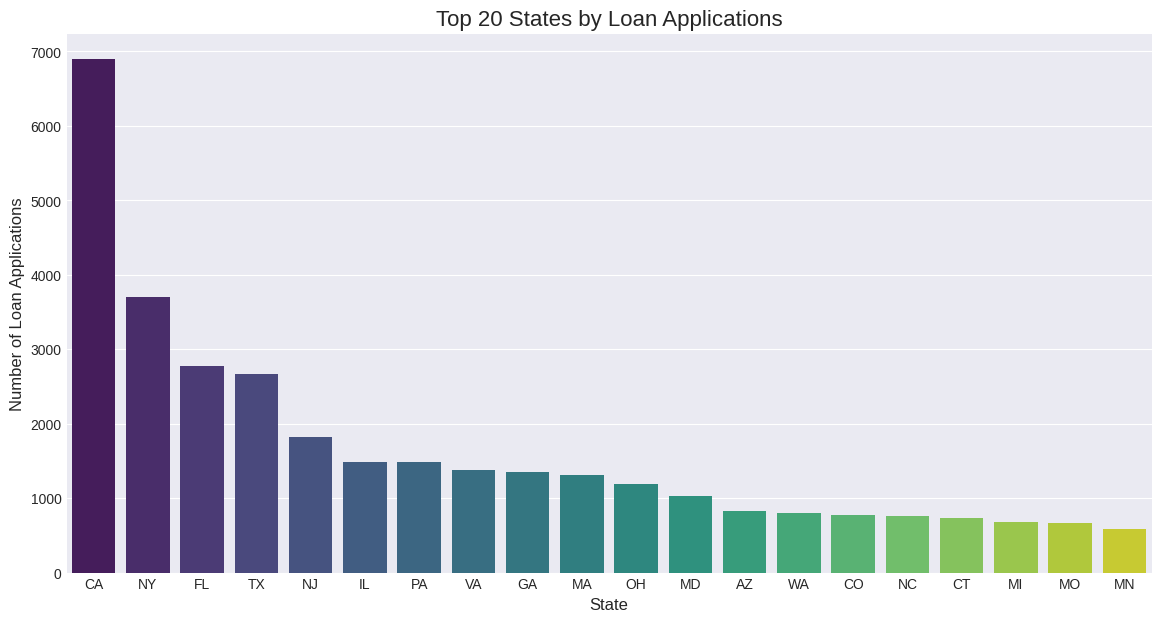

In [10]:
plt.figure(figsize=(14, 7))
STATE_ANALYSIS = LOAN_DATAFRAME['address_state'].value_counts().nlargest(20)
sns.barplot(x=STATE_ANALYSIS.index, y=STATE_ANALYSIS.values, palette='viridis')
plt.title('Top 20 States by Loan Applications', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Loan Applications', fontsize=12)
plt.show()

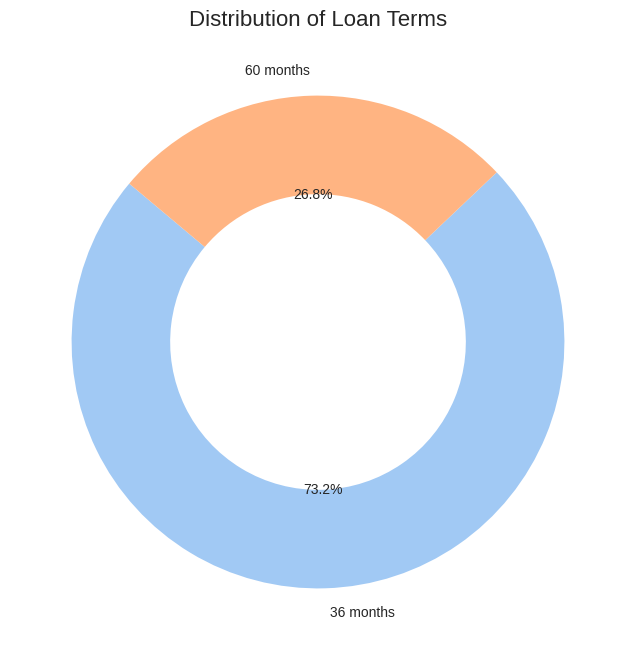

In [11]:
TERM_ANALYSIS = LOAN_DATAFRAME['term'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(TERM_ANALYSIS, labels=TERM_ANALYSIS.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))
plt.title('Distribution of Loan Terms', fontsize=16)
plt.ylabel('')
plt.show()

/tmp/ipython-input-2154227657.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




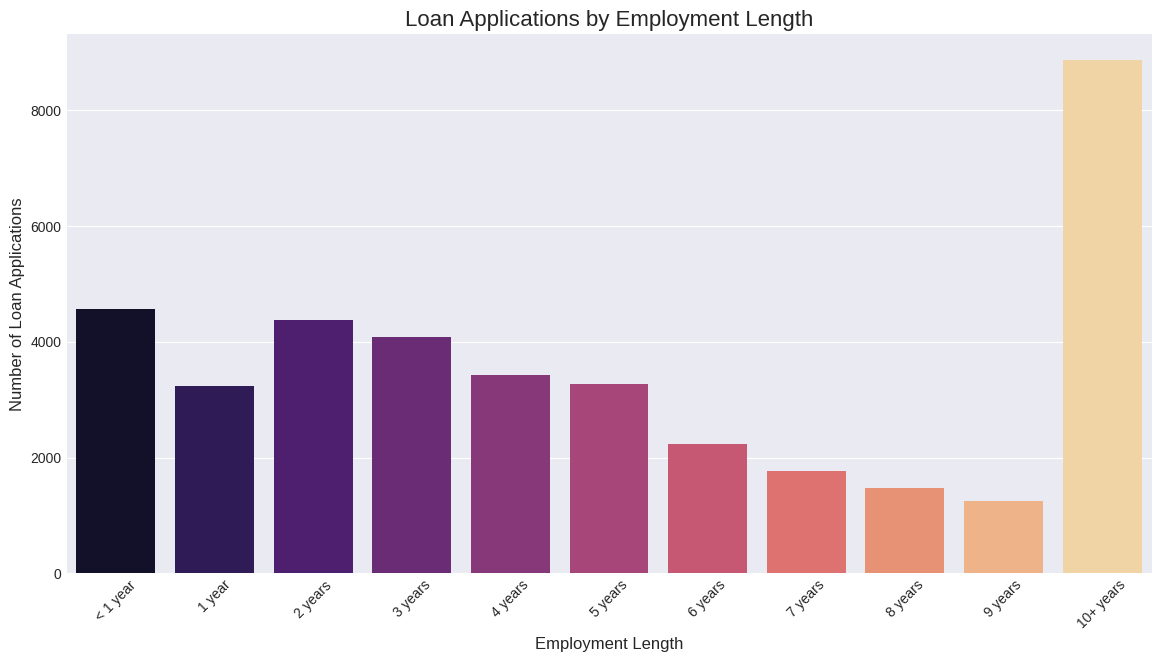

In [12]:
EMPLOYMENT_LENGTH_ORDER = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years',
    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'
]
LOAN_DATAFRAME['emp_length'] = pd.Categorical(LOAN_DATAFRAME['emp_length'], categories=EMPLOYMENT_LENGTH_ORDER, ordered=True)

plt.figure(figsize=(14, 7))
sns.countplot(data=LOAN_DATAFRAME, x='emp_length', palette='magma')
plt.title('Loan Applications by Employment Length', fontsize=16)
plt.xlabel('Employment Length', fontsize=12)
plt.ylabel('Number of Loan Applications', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-2966995008.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




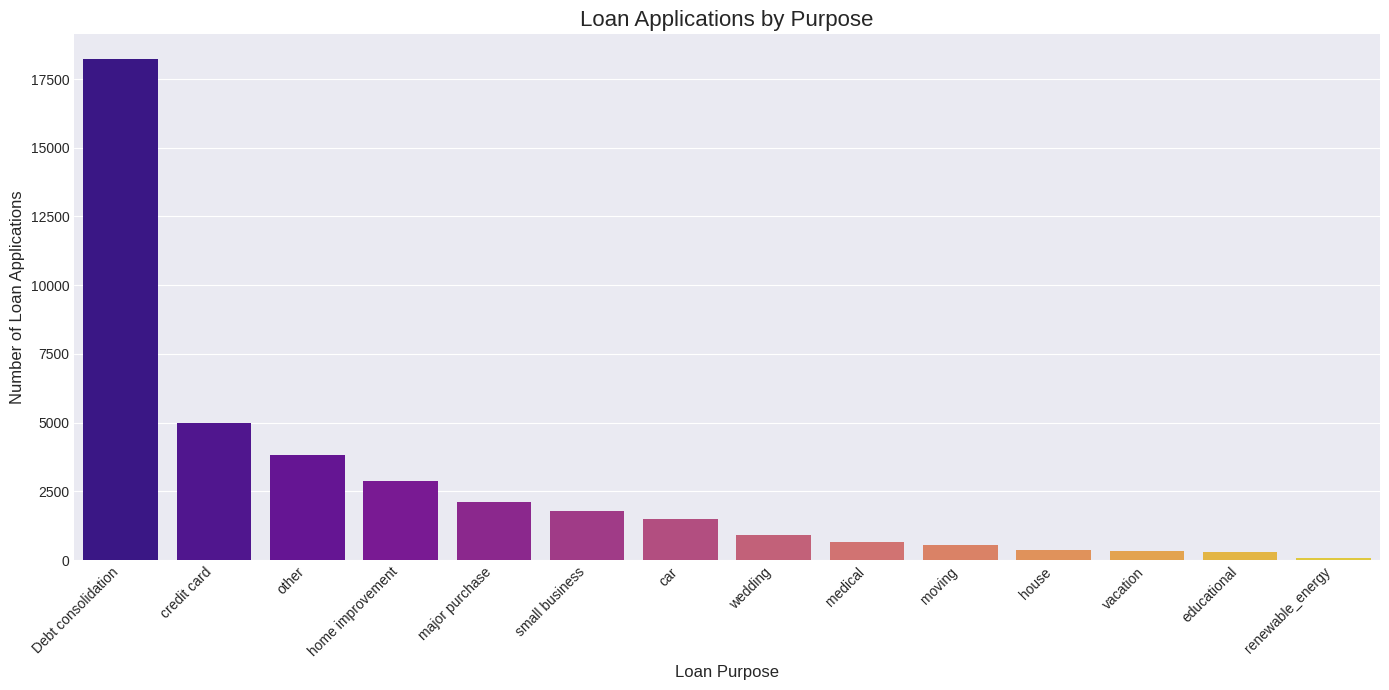

In [13]:
plt.figure(figsize=(14, 7))
PURPOSE_ANALYSIS = LOAN_DATAFRAME['purpose'].value_counts()
sns.barplot(x=PURPOSE_ANALYSIS.index, y=PURPOSE_ANALYSIS.values, palette='plasma')
plt.title('Loan Applications by Purpose', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Number of Loan Applications', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
HOME_OWNERSHIP_SUMMARY = LOAN_DATAFRAME.groupby('home_ownership').agg(
    TOTAL_APPLICATIONS=('id', 'count'),
    TOTAL_FUNDED_AMOUNT=('loan_amount', 'sum'),
    TOTAL_AMOUNT_RECEIVED=('total_payment', 'sum')
).reset_index()

FIGURE = px.treemap(HOME_OWNERSHIP_SUMMARY,
                 path=['home_ownership'],
                 values='TOTAL_APPLICATIONS',
                 color='TOTAL_FUNDED_AMOUNT',
                 hover_data=['TOTAL_AMOUNT_RECEIVED'],
                 color_continuous_scale='RdBu',
                 title='Home Ownership Analysis: Loan Applications, Funded Amount, and Amount Received')
FIGURE.show()